In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [3]:
%config InlineBackend.close_figures=False # tell pyplot not to close figures
np.warnings.filterwarnings('ignore') # silence numpy warning

In [4]:
# path to netcdf file
f = r'\\SFP.IDIR.BCGOV\U164\MLABIADH$\Profile\Desktop\TRAINING\RS\NetCDF\precip.comb.v2018to2016-v6monitorafter.total.nc'

In [5]:
# read as netcdf dataset. print info
ds = nc.Dataset(f)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Original_Source: http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm
 is the webpage and the data is at ftp://ftp.dwd.de/pub/data/gpcc/download.html
    Reference: Users of the data sets are kindly requested to give feed back and to refer to GPCC publications on this webpage: http://www.dwd.de/bvbw/appmanager/bvbw/dwdwwwDesktop/?_nfpb=true&_pageLabel=_dwdwww_klima_umwelt_datenzentren_wzn&T12404518261141645246564gsbDocumentPath=Content%2FOeffentlichkeit%2FKU%2FKU4%2FKU42%2Fteaser__product__access.html&_state=maximized&_windowLabel=T12404518261141645246564&lastPageLabel=_dwdwww_klima_umwelt_datenzentren_wzn
    original_source: ftp://ftp-anon.dwd.de/pub/data/gpcc/html/download_gate.html
    Conventions: CF 1.0
    dataset_title: Global Precipitation Climatology Centre (GPCC)
    title: GPCC Full Data Reanalysis Version 2018 1.0x1.0 Monthly Total
    history: Created 09/2018  based on V2018 data 

In [6]:
# explore variables stored in netcdf
ds.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     actual_range: [-89.5  89.5]
     long_name: Latitude
     standard_name: latitude
     axis: Y
     coordinate_defines: point
 unlimited dimensions: 
 current shape = (180,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     long_name: Longitude
     units: degrees_east
     standard_name: longitude
     actual_range: [  0.5 359.5]
     axis: X
     coordinate_defines: point
 unlimited dimensions: 
 current shape = (360,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     long_name: Time
     units: days since 1800-1-1 00:00:00
     delta_t: 0000-01-00 00:00:00
     avg_period: 0000-01-00 00:00:00
     standard_name: time
     axis: T
     coordinate_defines: start
     actual_range: [33237. 80322.]
 unlimited dimensions: time
 current 

In [7]:
# load data
prec = ds.variables['precip'][:]
lons = ds.variables['lon'][:]
lats = ds.variables['lat'][:]
time = ds.variables['time'][:]

Text(0.5, 1.0, 'Monthly Precipitation - September 2020')

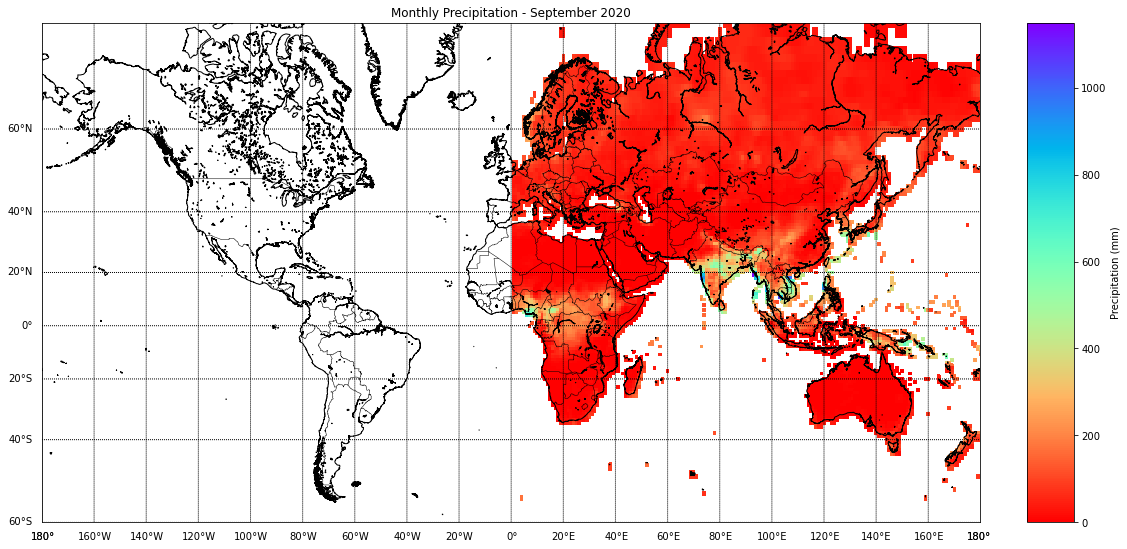

In [27]:

# create a basemap

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

mp = Basemap(projection = 'merc',
            llcrnrlon =-180 ,   # lower left corner longitute
            llcrnrlat =-60 ,
            urcrnrlon =180,
            urcrnrlat =75 ,
            resolution = 'i',
            ax = ax)

mp.drawcoastlines()
mp.drawcountries()
mp.drawparallels(np.arange(-80., 81., 20.), labels=[1,0,0,0], fontsize=10)
mp.drawmeridians(np.arange(-180., 181., 20.), labels=[0,0,0,1], fontsize=10)

# create meshgrid
lon, lat = np.meshgrid (lons, lats)
x,y = mp(lon, lat)

# plot the data
subset = np.squeeze(prec[1544, :, :]) # 1547 being the month of september of year 2020
cs = mp.pcolor(x,y,subset, cmap = 'rainbow_r')

cb = mp.colorbar(cs, location = "right", size="5%", pad="5%")
cb.set_label('Precipitation (mm)')
plt.title("Monthly Precipitation - September 2020")
#plt.show()